In [8]:
# début du projet python

On installe les packages nécessaires

In [9]:
#!pip install pathlib2
#!pip install python-Levenshtein
#!pip install --upgrade xlrd
#!pip install git+https://github.com/InseeFrLab/Py-Insee-Data.git
!pip install requests
!pip install openpyxl 
!pip install xlrd==1.2.0

On importe les modules

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pynsee
#import pynsee.download
import requests

# Autour des données
On commence par les importer du site du SDES

In [11]:
url = 'https://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2020-10/parc_logements_dpe_2018.xlsx'
s = requests.get(url).content

xl = pd.ExcelFile(s)  # io.BytesIO(s) is also work
xl.sheet_names        # see all sheet names

df_bdd_nat = xl.parse('Données locales - départements', nrows = 94, header = 0) 

In [12]:
df_bdd_nat

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G
0,1,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798
1,2,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402
2,3,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668
3,4,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997
4,5,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,4914.735893,21417.132067,65077.894164,223619.442964,158633.057599,56098.691995,25036.244386,0.008859,0.038604,0.117300,0.403065,0.285930,0.101116,0.045127
90,92,3952.337516,24325.651982,108860.889543,291769.385444,191267.313064,67934.593156,36196.184642,0.005457,0.033585,0.150297,0.402826,0.264070,0.093793,0.049974
91,93,7861.539249,29172.167427,89836.062946,225677.829625,169391.900378,64428.846933,34545.391183,0.012661,0.046983,0.144684,0.363461,0.272811,0.103765,0.055636
92,94,4011.990659,21283.610998,85105.637318,246936.800603,143563.293263,51870.938489,27602.925296,0.006913,0.036672,0.146639,0.425478,0.247363,0.089375,0.047560


On va rajouter une colonne qui donne le DPE moyen pour chaque département

On convient que le DPE A vaut 1 et que le DPE G faut 7, de sorte que plus le score obtenu est petit, meilleurs sont les logements du département

In [13]:
DPE_moy=[]
nb_dep=len(df_bdd_nat) #il y a bien 94 départements en France métropolitaine, hors Corse
for i in range(nb_dep):
    DPE_score=0
    DPE_score=df_bdd_nat.iloc[i]["Taux_A"]*1+df_bdd_nat.iloc[i]["Taux_B"]*2+df_bdd_nat.iloc[i]["Taux_C"]*3+df_bdd_nat.iloc[i]["Taux_D"]*4+df_bdd_nat.iloc[i]["Taux_E"]*5+df_bdd_nat.iloc[i]["Taux_F"]*6+df_bdd_nat.iloc[i]["Taux_G"]*7
    DPE_moy.append(DPE_score)

On va la rajouter dans un nouveau df, qui sera celui sur lequel on va travailler

In [14]:
df_bdd_nat_work=df_bdd_nat.copy(deep=True)

On concatène ci-dessous

In [15]:
df_bdd_nat_work=df_bdd_nat_work.assign(DPE_Moyen=DPE_moy)
# Vérifions que cela marche
df_bdd_nat_work.head()

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen
0,1,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929
1,2,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776
2,3,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923
3,4,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268
4,5,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483


Regardons à quoi cela ressemble

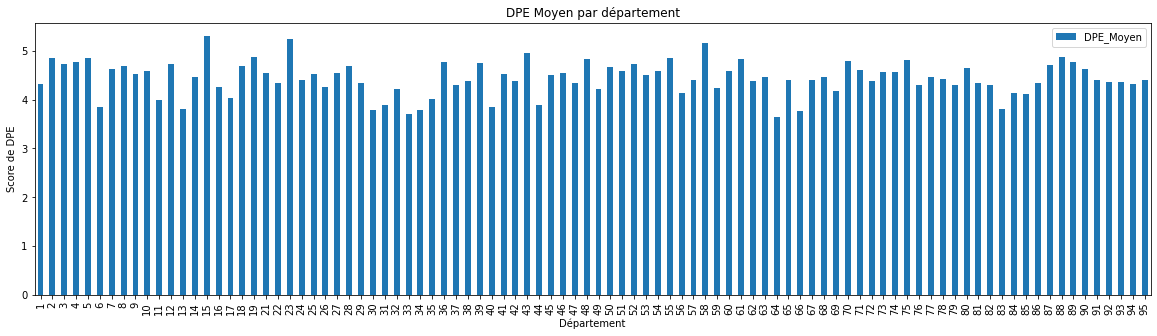

In [16]:
df_to_plot_0 = pd.DataFrame(df_bdd_nat_work,columns=['Département','DPE_Moyen'])
df_to_plot_0.plot(x ='Département', y='DPE_Moyen', kind = 'bar', figsize=(20,5), title="DPE Moyen par département")
plt.xlabel('Département')
plt.ylabel('Score de DPE')
plt.show()

### Etudions les passoires thermiques DPE F ou G

Commençons par calculer le pourcentage de passoires thermiques dans chaque département

In [17]:
# Derive New Column from Existing Column

df_bdd_nat_work=df_bdd_nat_work.assign(Taux_Passoires_Thermique=(df_bdd_nat_work['Taux_F']+df_bdd_nat_work['Taux_G'])*100)

In [18]:
df_bdd_nat_work.head(20)

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Taux_Passoires_Thermique
0,1,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,18.219730
1,2,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,28.873883
2,3,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,25.744696
3,4,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,29.176637
4,5,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,29.757824
5,6,11815.026075,32741.704372,168053.460347,212556.098431,87111.472985,31651.723590,10705.936616,0.021302,0.059033,0.302998,0.383236,0.157061,0.057068,0.019303,3.844133,7.637028
6,7,3450.067924,4613.980259,20072.427238,35529.974523,36784.778591,18058.046289,17657.344298,0.025337,0.033885,0.147411,0.260930,0.270145,0.132617,0.129675,4.633212,26.229182
7,8,357.615108,3440.964517,13073.048430,36849.557201,37741.272738,17002.884673,10990.062443,0.002994,0.028805,0.109439,0.308480,0.315944,0.142337,0.092001,4.700591,23.433805
8,9,729.642493,1878.391779,11710.841827,18670.598620,16823.926953,8738.068679,5995.503357,0.011304,0.029101,0.181431,0.289256,0.260646,0.135375,0.092886,4.536509,22.826124
9,10,598.450763,4300.754525,20864.624123,40957.694112,37944.387099,18652.026934,11393.319615,0.004442,0.031926,0.154884,0.304041,0.281672,0.138459,0.084576,4.580255,22.303516


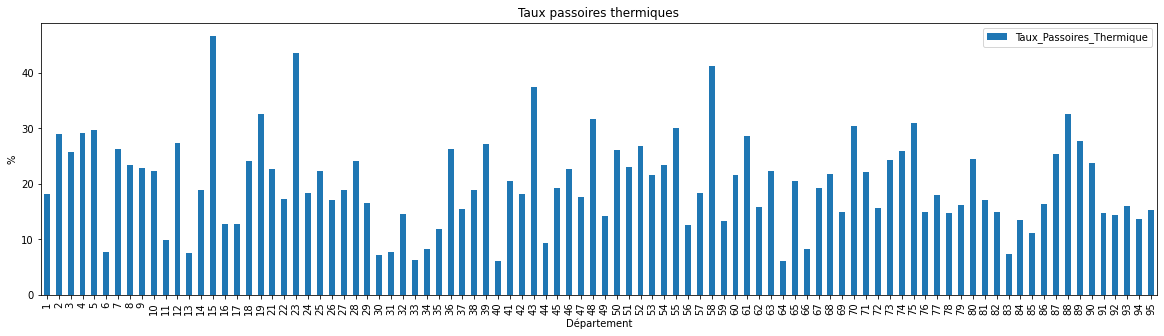

In [19]:
df_to_plot_1 = pd.DataFrame(df_bdd_nat_work,columns=['Département','Taux_Passoires_Thermique'])
df_to_plot_1.plot(x ='Département', y='Taux_Passoires_Thermique', kind = 'bar', figsize=(20,5), title="Taux passoires thermiques")
plt.xlabel('Département')
plt.ylabel('%')
plt.show()

Faisons un classement des meilleurs élèves

Pour plus de lisibilité, importons une base de données qui donne le nom des départements

In [20]:
url2 = 'https://www.business-plan-excel.fr/wp-content/uploads/2021/05/Liste-Excel-des-departements-francais.xlsx'
s2 = requests.get(url2).content

xl2 = pd.ExcelFile(s2)  # io.BytesIO(s) is also work
xl2.sheet_names        # see all sheet names

df_dep = xl2.parse('Départements français', nrows = 100, header = 0) 

In [21]:
df_dep.head(35)

,N°,Département,Chef-lieu,Région
0,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes
1,02,Aisne,Laon,Hauts-de-France
2,03,Allier,Moulins,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,Digne,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,Gap,Provence-Alpes-Côte d'Azur
5,06,Alpes-Maritimes,Nice,Provence-Alpes-Côte d'Azur
6,07,Ardèche,Privas,Auvergne-Rhône-Alpes
7,08,Ardennes,Charleville-Mézières,Grand Est
8,09,Ariège,Foix,Occitanie
9,10,Aube,Troyes,Grand Est


On voit que la Corse est présente, enlevons la de la liste des départements. De même pour les derniers départements des DOM-TOM.

Attention, à ne run qu'une fois, sauf à re-importer la bdd

In [22]:
df_dep=df_dep.drop(labels=None, axis=0, index=20)
df_dep=df_dep.drop(labels=None, axis=0, index=19)
df_dep=df_dep.drop(labels=None, axis=0, index=96)
df_dep=df_dep.drop(labels=None, axis=0, index=97)
df_dep=df_dep.drop(labels=None, axis=0, index=98)
df_dep=df_dep.drop(labels=None, axis=0, index=99)

In [23]:
len(df_dep)

94

In [24]:
df_bdd_nat_work.insert(1, "Département_nom",df_dep['Département'].tolist()) #on met la colonne vers le début du tableau

In [25]:
# Vérifions que cela marche
df_bdd_nat_work.head(35)

,Département,Département_nom,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Taux_Passoires_Thermique
0,1,Ain,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,18.219730
1,2,Aisne,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,28.873883
2,3,Allier,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,25.744696
3,4,Alpes-de-Haute-Provence,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,29.176637
4,5,Hautes-Alpes,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,29.757824
5,6,Alpes-Maritimes,11815.026075,32741.704372,168053.460347,212556.098431,87111.472985,31651.723590,10705.936616,0.021302,0.059033,0.302998,0.383236,0.157061,0.057068,0.019303,3.844133,7.637028
6,7,Ardèche,3450.067924,4613.980259,20072.427238,35529.974523,36784.778591,18058.046289,17657.344298,0.025337,0.033885,0.147411,0.260930,0.270145,0.132617,0.129675,4.633212,26.229182
7,8,Ardennes,357.615108,3440.964517,13073.048430,36849.557201,37741.272738,17002.884673,10990.062443,0.002994,0.028805,0.109439,0.308480,0.315944,0.142337,0.092001,4.700591,23.433805
8,9,Ariège,729.642493,1878.391779,11710.841827,18670.598620,16823.926953,8738.068679,5995.503357,0.011304,0.029101,0.181431,0.289256,0.260646,0.135375,0.092886,4.536509,22.826124
9,10,Aube,598.450763,4300.754525,20864.624123,40957.694112,37944.387099,18652.026934,11393.319615,0.004442,0.031926,0.154884,0.304041,0.281672,0.138459,0.084576,4.580255,22.303516


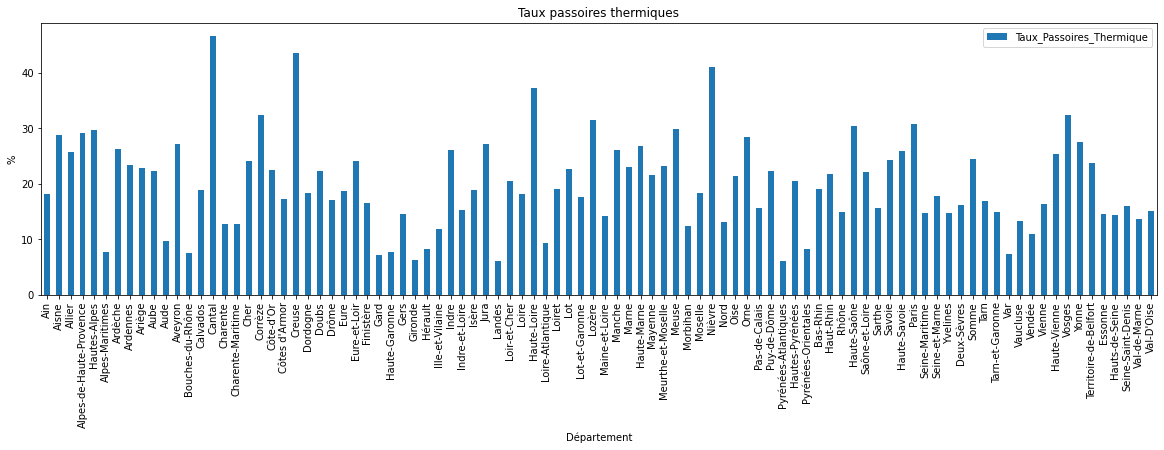

In [26]:
df_to_plot_2 = pd.DataFrame(df_bdd_nat_work,columns=['Département_nom','Taux_Passoires_Thermique'])
df_to_plot_2.plot(x ='Département_nom', y='Taux_Passoires_Thermique', kind = 'bar', figsize=(20,5), title="Taux passoires thermiques")
plt.xlabel('Département')
plt.ylabel('%')
plt.show()

## Un peu de visualisation spatiale

### On commence par importer ce qu'il nous faut

In [27]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas

import geopandas as gpd
import contextily as ctx
import cartiflette.s3

##### On récupère un fond de carte français

In [4]:
from cartiflette.download import get_vectorfile_ign
france = get_vectorfile_ign(level = "COMMUNE", field = "metropole")
france['surface'] = france.area.div(10**6)

Downloading: 100%|██████████| 244M/244M [02:04<00:00, 2.05MiB/s] 


In [5]:
france['surface'] = france.area.div(10**6)

In [43]:
france_copy=france.dissolve(by='INSEE_DEP', aggfunc='sum')

##### Un peu de data cleaning

In [47]:
france_copy.head(30) #on voit que la Corse est présente en bas du tableau, on va devoir l'enlever

,geometry,POPULATION,surface
INSEE_DEP,,,
01,"POLYGON ((903855.600 6506054.200, 903768.700 6...",652432,5774.264919
02,"POLYGON ((729632.700 6864100.700, 729589.100 6...",531345,7418.591125
03,"POLYGON ((753220.400 6537855.400, 753209.100 6...",335975,7365.660274
04,"POLYGON ((922042.000 6296470.900, 922029.600 6...",164308,6994.193101
05,"POLYGON ((920013.800 6349446.400, 920011.100 6...",141220,5685.026797
06,"MULTIPOLYGON (((1019723.800 6272860.700, 10197...",1094283,4294.731822
07,"POLYGON ((796502.100 6355586.100, 796449.800 6...",328278,5561.382596
08,"POLYGON ((823921.200 6907564.300, 823749.200 6...",270582,5251.889410
09,"POLYGON ((602772.100 6165146.200, 602736.900 6...",153287,4921.022056


In [58]:
#à ne compiler qu'une fois

france_copy.drop('2A',axis=0,inplace=True)
france_copy.drop('2B',axis=0,inplace=True)

# on a rendu son indépendance à la corse

#### Visualisons les DPE

In [72]:
DPE_liste=df_bdd_nat_work['DPE_Moyen'].tolist() 

france_DPE = france_copy.assign(DPE=DPE_liste)
france_DPE

,geometry,POPULATION,surface,DPE
INSEE_DEP,,,,
01,"POLYGON ((903855.600 6506054.200, 903768.700 6...",652432,5774.264919,4.325929
02,"POLYGON ((729632.700 6864100.700, 729589.100 6...",531345,7418.591125,4.862776
03,"POLYGON ((753220.400 6537855.400, 753209.100 6...",335975,7365.660274,4.723923
04,"POLYGON ((922042.000 6296470.900, 922029.600 6...",164308,6994.193101,4.778268
05,"POLYGON ((920013.800 6349446.400, 920011.100 6...",141220,5685.026797,4.856483
...,...,...,...,...
91,"POLYGON ((622850.700 6801326.900, 622865.600 6...",1301659,1818.556444,4.402458
92,"POLYGON ((649817.800 6852242.000, 649795.100 6...",1624357,175.570732,4.367739
93,"POLYGON ((667715.200 6865092.800, 667712.900 6...",1644903,236.867946,4.370616


<AxesSubplot:title={'center':'DPE Moyens sur le territoire, A=1, G=7'}>

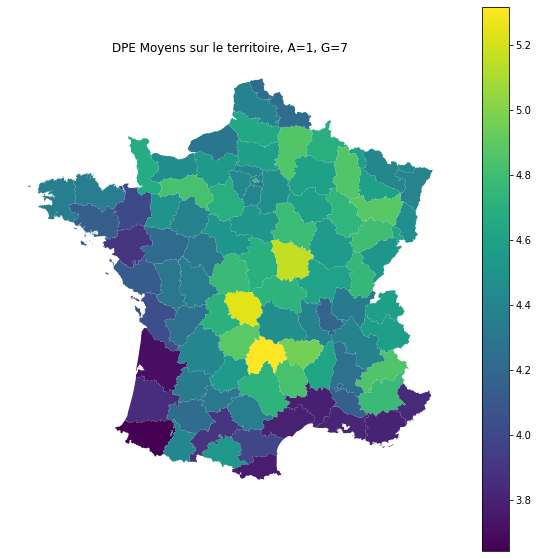

In [67]:
fig,ax = plt.subplots(figsize=(10, 10))
france_DPE.plot(ax = ax, column = "DPE", legend=True)
ax.set_axis_off()
plt.title('DPE Moyens sur le territoire, A=1, G=7')
ax

#### Visualisons les taux de passoires thermiques

In [71]:
passoires=df_bdd_nat_work['Taux_Passoires_Thermique'].tolist() 
france_passoires = france_copy.assign(passoires=passoires)
france_passoires

,geometry,POPULATION,surface,passoires
INSEE_DEP,,,,
01,"POLYGON ((903855.600 6506054.200, 903768.700 6...",652432,5774.264919,18.219730
02,"POLYGON ((729632.700 6864100.700, 729589.100 6...",531345,7418.591125,28.873883
03,"POLYGON ((753220.400 6537855.400, 753209.100 6...",335975,7365.660274,25.744696
04,"POLYGON ((922042.000 6296470.900, 922029.600 6...",164308,6994.193101,29.176637
05,"POLYGON ((920013.800 6349446.400, 920011.100 6...",141220,5685.026797,29.757824
...,...,...,...,...
91,"POLYGON ((622850.700 6801326.900, 622865.600 6...",1301659,1818.556444,14.624251
92,"POLYGON ((649817.800 6852242.000, 649795.100 6...",1624357,175.570732,14.376621
93,"POLYGON ((667715.200 6865092.800, 667712.900 6...",1644903,236.867946,15.940095


<AxesSubplot:title={'center':'Taux de passoires thermiques'}>

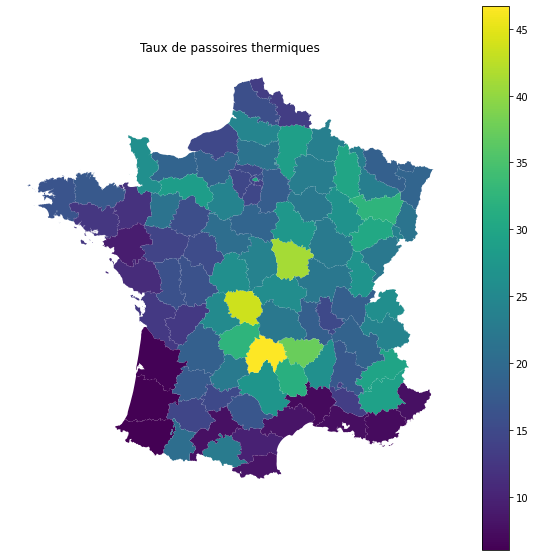

In [74]:
fig,ax = plt.subplots(figsize=(10, 10))
france_passoires.plot(ax = ax, column = "passoires", legend=True)
ax.set_axis_off()
plt.title('Taux de passoires thermiques')
ax